In [1]:
import pandas as pd
from copy import deepcopy
from datetime import datetime, timedelta, date
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
# from darts.models.forecasting.prophet_model import Prophet
# from prophet import Prophet
from darts.models.forecasting.prophet_model import Prophet
from darts import TimeSeries
from sklearn.metrics import mean_absolute_percentage_error
from tqdm import tqdm
import logging
from darts.models.forecasting.arima import ARIMA
from darts.models.forecasting.auto_arima import AutoARIMA
from darts.models.forecasting.theta import Theta
from darts.models.forecasting.exponential_smoothing import ExponentialSmoothing
from darts.models.forecasting.sf_auto_arima import StatsForecastAutoARIMA

/Users/tejas.gujjar/anaconda3/envs/ande/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [53]:
df = pd.read_csv('usage_leap_acc1.csv')
df2 = pd.read_csv('usage_leap_acc2.csv')
df3 = pd.read_csv('usage_leap_acc3.csv')
df4 = pd.read_csv('usage_leap_acc4.csv')
df5 = pd.read_csv('usage_leap_acc5.csv')
df6 = pd.read_csv('usage_leap_acc6.csv')
df7 = pd.read_csv('usage_leap_acc7.csv')
uom = pd.read_csv('uom_price.csv')

uom.sort_values(by = ['Price'], inplace = True)
uom = uom.drop_duplicates(
  subset = ['UOM'],
  keep = 'last').reset_index(drop = True)


In [80]:
tf = deepcopy(df)
tf.sort_values(by = ['createdAt'], inplace=True)
tf.reset_index(inplace=True, drop=True)
tf = tf.drop_duplicates(
    subset = ['guid', 'startdatetime', 'uom'],
    keep = 'last').reset_index(drop = True)
tf['createdAt'] = pd.to_datetime(tf['createdAt'])
tf['createdAt'] = tf['createdAt'].dt.date
tf['startdatetime'] = pd.to_datetime(tf['startdatetime'])
tf['startdatetime'] = tf['startdatetime'].dt.date
display(tf.startdatetime.min())
display(tf.startdatetime.max())
mask = (tf.startdatetime >= pd.Timestamp('2023-02-02')) & (tf.startdatetime < pd.Timestamp('2023-03-22'))
display(tf.loc[mask])
tf = tf.loc[mask]
tf

datetime.date(2023, 2, 2)

datetime.date(2023, 6, 21)

/Users/tejas.gujjar/anaconda3/envs/ande/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,total_qty,uom,guid,createdAt,startdatetime
0,17.75,DRAAS_GOLD_NUMBER_VCPU_EU_GERMANY_1,703c1b8b-3f34-5038-d51d-7f201ac0c706,2023-02-02,2023-02-02
1,1.00,IP_HOURS_EU_GERMANY_1,2220acc8-d867-2d72-ee70-e3d245282673,2023-02-02,2023-02-02
2,194.00,DRAAS_GOLD_GB_MEMORY_EU_GERMANY_1,1ac68ce2-69e5-a47f-0678-931a742aa195,2023-02-02,2023-02-02
3,17.75,DRAAS_GOLD_NUMBER_VCPU_EU_GERMANY_1,c3a3d1a7-ea17-2869-9912-1fed8e6d21c7,2023-02-02,2023-02-02
4,194.00,DRAAS_GOLD_GB_MEMORY_EU_GERMANY_1,225690ff-4d9a-0a59-c9b8-680716eff80d,2023-02-02,2023-02-02
...,...,...,...,...,...
3415,322.00,DRAAS_GOLD_GB_MEMORY_EU_GERMANY_1,59c68563-0499-6ad1-5afe-42117b05221a,2023-03-22,2023-03-21
3416,1.00,IP_HOURS_EU_GERMANY_1,bc33368d-79f0-2397-dedb-3fe8098db1a6,2023-03-22,2023-03-21
3417,1.00,IP_HOURS_EU_GERMANY_1,5e115cc4-0186-16af-b2f6-6513bac3fa01,2023-03-22,2023-03-21
3418,27.00,DRAAS_GOLD_NUMBER_VCPU_EU_GERMANY_1,ebc80e69-321c-51b3-0a3b-970745bda3c7,2023-03-22,2023-03-21


,total_qty,uom,guid,createdAt,startdatetime
0,17.75,DRAAS_GOLD_NUMBER_VCPU_EU_GERMANY_1,703c1b8b-3f34-5038-d51d-7f201ac0c706,2023-02-02,2023-02-02
1,1.00,IP_HOURS_EU_GERMANY_1,2220acc8-d867-2d72-ee70-e3d245282673,2023-02-02,2023-02-02
2,194.00,DRAAS_GOLD_GB_MEMORY_EU_GERMANY_1,1ac68ce2-69e5-a47f-0678-931a742aa195,2023-02-02,2023-02-02
3,17.75,DRAAS_GOLD_NUMBER_VCPU_EU_GERMANY_1,c3a3d1a7-ea17-2869-9912-1fed8e6d21c7,2023-02-02,2023-02-02
4,194.00,DRAAS_GOLD_GB_MEMORY_EU_GERMANY_1,225690ff-4d9a-0a59-c9b8-680716eff80d,2023-02-02,2023-02-02
...,...,...,...,...,...
3415,322.00,DRAAS_GOLD_GB_MEMORY_EU_GERMANY_1,59c68563-0499-6ad1-5afe-42117b05221a,2023-03-22,2023-03-21
3416,1.00,IP_HOURS_EU_GERMANY_1,bc33368d-79f0-2397-dedb-3fe8098db1a6,2023-03-22,2023-03-21
3417,1.00,IP_HOURS_EU_GERMANY_1,5e115cc4-0186-16af-b2f6-6513bac3fa01,2023-03-22,2023-03-21
3418,27.00,DRAAS_GOLD_NUMBER_VCPU_EU_GERMANY_1,ebc80e69-321c-51b3-0a3b-970745bda3c7,2023-03-22,2023-03-21


/Users/tejas.gujjar/anaconda3/envs/ande/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,startdatetime,total_amount
0,2023-02-02,0.275004
1,2023-02-03,0.550008
2,2023-02-04,0.550008
3,2023-02-05,0.550008
4,2023-02-06,0.550008
5,2023-02-07,0.550008
6,2023-02-08,0.550008
7,2023-02-09,0.550008
8,2023-02-10,0.550008
9,2023-02-11,0.550008


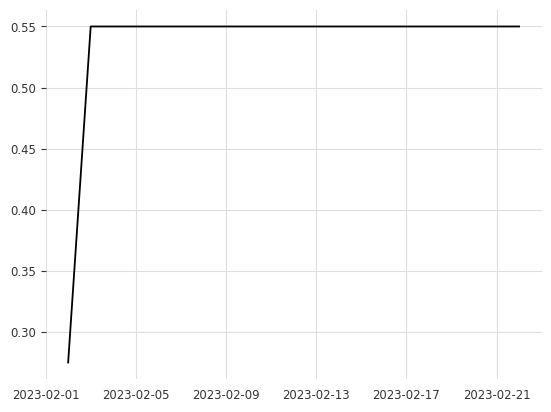

In [101]:
tf = deepcopy(df2)
tf.sort_values(by = ['createdAt'], inplace=True)
tf.reset_index(inplace=True, drop=True)
tf = tf.drop_duplicates(
    subset = ['guid', 'startdatetime', 'uom'],
    keep = 'last').reset_index(drop = True)
tf['createdAt'] = pd.to_datetime(tf['createdAt'])
tf['createdAt'] = tf['createdAt'].dt.date
tf['startdatetime'] = pd.to_datetime(tf['startdatetime'])
tf['startdatetime'] = tf['startdatetime'].dt.date

mask = (tf.startdatetime >= pd.Timestamp('2023-02-02')) & (tf.startdatetime <= pd.Timestamp('2023-02-22'))
tf = tf.loc[mask]


grouped_df = tf.groupby(['uom', 'startdatetime']).agg({'total_qty': 'sum'}).reset_index()
final_df = pd.merge(grouped_df, uom, left_on = 'uom', right_on = 'UOM', how = 'left')
final_df['total_amount'] = final_df['total_qty']*final_df['Price']
final_df = final_df.groupby(['startdatetime']).agg({'total_amount': 'sum'}).reset_index()
final_df['startdatetime'] = pd.to_datetime(final_df['startdatetime'])

display(final_df)
series = TimeSeries.from_dataframe(final_df, 'startdatetime', 'total_amount', fill_missing_dates=True, freq=None)
series = series[:-1]


fig, ax = plt.subplots()
ax.plot(final_df["startdatetime"], final_df["total_amount"]);

In [36]:
df

,total_qty,uom,guid,createdAt,startdatetime
0,194.0,DRAAS_GOLD_GB_MEMORY_EU_GERMANY_1,00278713-3adf-f498-d56c-071552e237d9,2023-02-20 10:01:21+00,2023-02-20 08:00:00+00
1,322.0,DRAAS_GOLD_GB_MEMORY_EU_GERMANY_1,003046b4-c233-a4ef-d8e6-b91bc20d7cf5,2023-04-20 00:01:38+00,2023-04-19 22:00:00+00
2,322.0,DRAAS_GOLD_GB_MEMORY_EU_GERMANY_1,004a1a88-30b8-b706-9e50-6cd94e81dfaf,2023-05-20 09:01:13+00,2023-05-20 07:00:00+00
3,194.0,DRAAS_GOLD_GB_MEMORY_EU_GERMANY_1,00521312-e2e9-e801-c388-dbf000d89d9f,2023-03-06 18:01:31+00,2023-03-06 16:00:00+00
4,322.0,DRAAS_GOLD_GB_MEMORY_EU_GERMANY_1,005ddda9-e020-2341-5564-96608c1a52e9,2023-04-13 01:01:42+00,2023-04-12 23:00:00+00
...,...,...,...,...,...
10033,1.0,IP_HOURS_EU_GERMANY_1,ffd3a33b-d189-019e-470b-41347130b690,2023-03-08 09:01:50+00,2023-03-08 07:00:00+00
10034,1.0,IP_HOURS_EU_GERMANY_1,ffde3042-f07c-c9e5-4173-b471b4402084,2023-05-07 07:01:38+00,2023-05-07 05:00:00+00
10035,1.0,IP_HOURS_EU_GERMANY_1,ffe84319-bb50-ba61-f780-81c9691188b9,2023-03-13 02:01:26+00,2023-03-13 00:00:00+00
10036,1.0,IP_HOURS_EU_GERMANY_1,ffed8cb7-7d54-9a7f-d40d-d9eb5c62f841,2023-04-22 16:01:31+00,2023-04-22 14:00:00+00


In [3]:
def predictUsage(data, tenantuuid, mincommit, model_fn):
  df = deepcopy(data)
  df.sort_values(by = ['createdAt'], inplace=True)
  df.reset_index(inplace=True, drop=True)
  df = df.drop_duplicates(
    subset = ['guid', 'startdatetime', 'uom'],
    keep = 'last').reset_index(drop = True)
  df['createdAt'] = pd.to_datetime(df['createdAt'])
  df['createdAt'] = df['createdAt'].dt.date
  df['startdatetime'] = pd.to_datetime(df['startdatetime'])
  df['startdatetime'] = df['startdatetime'].dt.date
  grouped_df = df.groupby(['uom', 'startdatetime']).agg({'total_qty': 'sum'}).reset_index()
  final_df = pd.merge(grouped_df, uom, left_on = 'uom', right_on = 'UOM', how = 'left')
  final_df['total_amount'] = final_df['total_qty']*final_df['Price']
  final_df = final_df.groupby(['startdatetime']).agg({'total_amount': 'sum'}).reset_index()
  final_df['startdatetime'] = pd.to_datetime(final_df['startdatetime'])

  series = TimeSeries.from_dataframe(final_df, 'startdatetime', 'total_amount')
  series = series[:-1]

  model = model_fn
  model.fit(series)
  prediction = model.predict(30, num_samples=1)

  fig, ax = plt.subplots()
  # ax.axhline(y=mincommit, xmin=0, xmax=1, color='red', linewidth=2, label = 'PPDD Balance')
  series.plot(label='actual')
  prediction.plot(label='forecast')
  ax.set_title("Usage Prediction\nTenantuuid: {}".format(tenantuuid))
  ax.set_ylim(ymin=0)
  plt.legend()

15:59:53 - cmdstanpy - INFO - Chain [1] start processing
15:59:53 - cmdstanpy - INFO - Chain [1] done processing


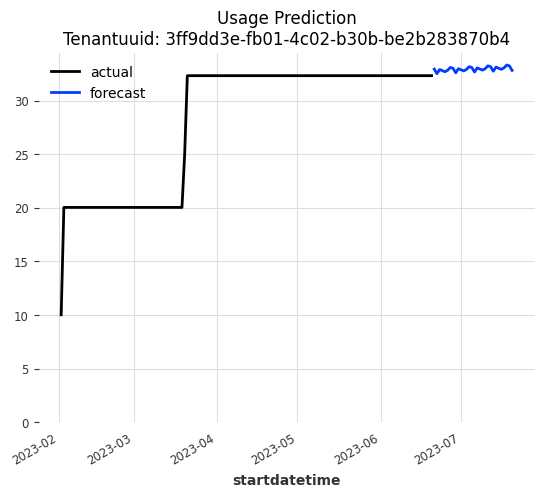

In [4]:
predictUsage(df, '3ff9dd3e-fb01-4c02-b30b-be2b283870b4', 2428, Prophet())

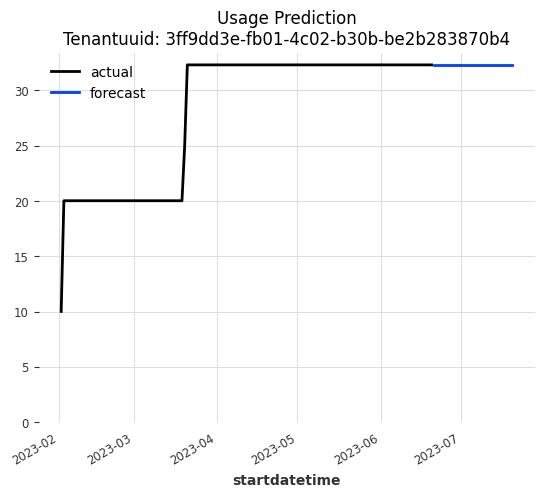

In [29]:
predictUsage(df, '3ff9dd3e-fb01-4c02-b30b-be2b283870b4', 1750, StatsForecastAutoARIMA())

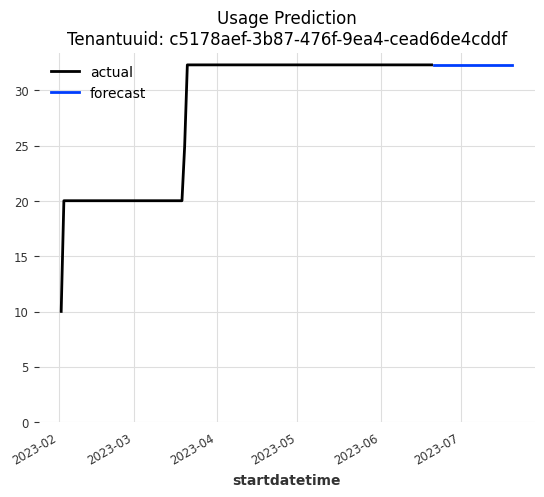

In [30]:
predictUsage(df, 'c5178aef-3b87-476f-9ea4-cead6de4cddf', 4345.42, StatsForecastAutoARIMA())

In [ ]:
predictUsage(df4, 'fdd639ff-3d4a-456c-9aba-17d5ab6f7a2e', 48952.96, Prophet())

In [ ]:
predictUsage(df5, 'b540d455-a134-4403-af78-497c77a74e53', 0, Prophet())

In [ ]:
predictUsage(df6, '358ef1a3-1f67-45f1-9534-ec84d5053677', 1762, Prophet())

In [ ]:
predictUsage(df7, '5126b2cb-ea08-41fd-90f6-9ea1165a43dc', 9619.79, Prophet())